In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


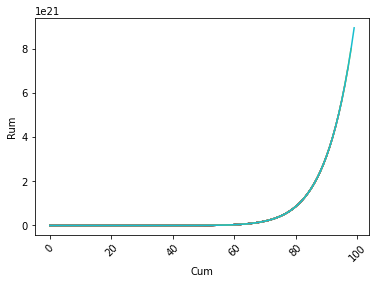

   Cum      Rum
0    0        0
1    1        1
2    2     2048
3    3   177147
4    4  4194304


In [34]:
cumming = []
rumming = []
for i in range(100):
    cumming.append(i)
    rumming.append(i**11)
    data = {'Cum':cumming, "Rum":rumming}
    df = pd.DataFrame(data)
    sns.lineplot(data=df,x='Cum', y='Rum')
plt.xticks(rotation=45)
plt.show()

print(df.head())


In [14]:
import datetime 

In [28]:
datetime.datetime.now().strftime('%H:%M:%S')

'10:54:20'

In [24]:
datetime.datetime.utcnow()#.strftime('%d%H%M%S')

datetime.datetime(2022, 6, 23, 4, 52, 58, 298374)

In [38]:
a= 'x'
def print_x(a):
    print('x'+a)
    
def print_y(a):
    print(a+'y')
    
def print_xy(a):
    print_x(a)
    print_y(a)

print_xy(a)

xx
xy


In [1]:
import sqlite3

db_log = sqlite3.connect('rough.db')
try:
    db_log.cursor().execute("""
        CREATE TABLE log_table (
            symbol TEXT,
            qty INTEGER,
            buy_price REAL,
            sell_price REAL,
            buy_time REAL,
            sell_time REAL,
            profit REAL
        )""")
except:
    print("Table 'log_table' already exists")
    
db_log.commit()
db_log.close()

Table 'log_table' already exists


In [4]:
from datetime import datetime
def add_to_db_log(symbol, qty, buy_price):
    buy_time = int(datetime.utcnow().strftime('%d%H%M%S'))
    sell_price = 0
    sell_time = 0
    execute_db_log(f"INSERT INTO log_table VALUES ('{symbol}',{qty},{buy_price},{sell_price},{buy_time},{sell_time})")
#     execute(f"INSERT INTO inventory VALUES ('{symbol}',{price},{qty},{time})")
    
    
def execute_db_log(command):
    db_log = sqlite3.connect('rough.db')
    cursor = db_log.cursor()
    cursor.execute(command)
    cursor.execute("SELECT * FROM log_table")
    print(cursor.fetchall())
    db_log.commit()
    db_log.close()
    
add_to_db_log('STFO',1,2.67)

[('STFO', 1, 2.67, 12.3, 23163751.0, 23163751.0), ('STFO', 1, 2.67, 12.3, 23164557.0, 23164557.0), ('STFO', 1, 2.67, 0.0, 23164628.0, 0.0)]


In [139]:
import time
import requests
import pandas as pd
import sqlalchemy, os
from binance import BinanceSocketManager
from binance.client import Client
from datetime import datetime, timedelta
from dotenv import load_dotenv

load_dotenv()

API_KEY = os.environ.get("API_KEY")
API_SECRET = os.environ.get("API_SECRET")

# Binance Client
client = Client(API_KEY, API_SECRET)

# list_symbols_USDT = [item["symbol"] for item in client.get_exchange_info()["symbols"] if ("USDT" in item["symbol"]) & ("DOWN" not in item["symbol"])]
# print_file(list_symbols_USDT,'pairs')


print(client.get_exchange_info()["symbols"])
# print(client.get_exchange_info()["symbols"][1]['symbol'])

# list_sym = [item['symbol'] for item in client.get_exchange_info()['symbols'] if ('USDT' in item['symbol']) & ('DOWN' not in item['symbol'])]
# print(list_sym)

# level1 = [item for item in [item['symbol'] for item in client.get_ticker() if float(item['priceChangePercent'])>10.0] if ('USDT' in item) & ('DOWN' not in item)]
# level1
# print(client.get_ticker()[0]['priceChangePercent'])
# print('\n')
sym = [item for item in [item['symbol'] for item in client.get_ticker() if float(item['priceChangePercent'])>10.0] if ('USDT' in item) & ('DOWN' not in item)]

# client.get_historical_klines(symbol, Client.KLINE_INTERVAL_1MINUTE, str(prev_time), str(now_time))
# for symbol in sym:
print('FTMUSDT')
print("open prev",(client.get_historical_klines('FTMUSDT', Client.KLINE_INTERVAL_1MINUTE,str(datetime.now() -timedelta(hours=7)), str(datetime.now()),))[0][1])  #open prev
print("open prev",(client.get_historical_klines('FTMUSDT', Client.KLINE_INTERVAL_1MINUTE,str(datetime.now() -timedelta(hours=7)), str(datetime.now()),))[0][1])  #open prev


# at_hour = (client.get_historical_klines('FTMUSDT', Client.KLINE_INTERVAL_1MINUTE,str(datetime.now() -timedelta(hours=7)), str(datetime.now()),))[i][1]




print("open prev",(client.get_historical_klines('FTMUSDT', Client.KLINE_INTERVAL_1MINUTE, str(datetime.now() -timedelta(minutes=390)), str(datetime.now()))  #open prev

# # print(client.get_historical_klines('FTMUSDT', Client.KLINE_INTERVAL_1MINUTE,str(datetime.now() -timedelta(hours=7)), str(datetime.now()),)[0][4])  #close prev


# print('open now',client.get_historical_klines('FTMUSDT', Client.KLINE_INTERVAL_1MINUTE,str(datetime.now() -timedelta(hours=7)), str(datetime.now()),)[-1][1]) #open now


# print(client.get_historical_klines('FTMUSDT', Client.KLINE_INTERVAL_1MINUTE,str(datetime.now() -timedelta(hours=7)), str(datetime.now()),)[-1][4]) #close now


# print(Client.KLINE_INTERVAL_1MINUTE)

[{'symbol': 'ETHBTC', 'status': 'TRADING', 'baseAsset': 'ETH', 'baseAssetPrecision': 8, 'quoteAsset': 'BTC', 'quotePrecision': 8, 'quoteAssetPrecision': 8, 'baseCommissionPrecision': 8, 'quoteCommissionPrecision': 8, 'orderTypes': ['LIMIT', 'LIMIT_MAKER', 'MARKET', 'STOP_LOSS_LIMIT', 'TAKE_PROFIT_LIMIT'], 'icebergAllowed': True, 'ocoAllowed': True, 'quoteOrderQtyMarketAllowed': True, 'allowTrailingStop': True, 'cancelReplaceAllowed': False, 'isSpotTradingAllowed': True, 'isMarginTradingAllowed': True, 'filters': [{'filterType': 'PRICE_FILTER', 'minPrice': '0.00000100', 'maxPrice': '922327.00000000', 'tickSize': '0.00000100'}, {'filterType': 'PERCENT_PRICE', 'multiplierUp': '5', 'multiplierDown': '0.2', 'avgPriceMins': 5}, {'filterType': 'LOT_SIZE', 'minQty': '0.00010000', 'maxQty': '100000.00000000', 'stepSize': '0.00010000'}, {'filterType': 'MIN_NOTIONAL', 'minNotional': '0.00010000', 'applyToMarket': True, 'avgPriceMins': 5}, {'filterType': 'ICEBERG_PARTS', 'limit': 10}, {'filterType

FTMUSDT
open prev 0.29760000
open prev 0.29760000


IndexError: list index out of range

In [98]:

at_30m_window =(client.get_historical_klines('FTMUSDT', Client.KLINE_INTERVAL_1MINUTE,str(datetime.now() -timedelta(minutes=390)), str(datetime.now()),))[0][1]
print('og',at_30m_window)


for i in range(60):
    hourly = (client.get_historical_klines('FTMUSDT', Client.KLINE_INTERVAL_1MINUTE,str(datetime.now() -timedelta(hours=7)), str(datetime.now()),))[i][1]
    if hourly == at_30m_window:
        print(hourly)
        print(i)


og 0.30850000
0.30850000
15
0.30850000
30


In [ ]:

at_30m_window =(client.get_historical_klines('FTMUSDT', Client.KLINE_INTERVAL_1MINUTE,str(datetime.now() -timedelta(minutes=390)), str(datetime.now()),))[0][1]
print('og',at_30m_window)


for i in range(60):
    hourly = (client.get_historical_klines('FTMUSDT', Client.KLINE_INTERVAL_1MINUTE,str(datetime.now() -timedelta(hours=7)), str(datetime.now()),))[i][1]
    if hourly == at_30m_window:
        print(hourly)
        print(i)


In [99]:

at_30m_window =(client.get_historical_klines('FTMUSDT', Client.KLINE_INTERVAL_1MINUTE,str(datetime.now() -timedelta(minutes=390)), str(datetime.now()),))[0][1]
print('og',at_30m_window)

hourly = (client.get_historical_klines(
        'FTMUSDT', 
        Client.KLINE_INTERVAL_1MINUTE,
        str(datetime.now() -timedelta(hours=7)), 
        str(datetime.now()),))

for i in range(60):
    if hourly[i][1] == at_30m_window:
        print(hourly[i][1])
        print(i)


og 0.31190000
0.31190000
30


In [137]:
#hours=12 minutes=721
#test tool for figuring out index of 1hr 30min in 6hours window 
at_30m_window =(client.get_historical_klines('FTMUSDT', Client.KLINE_INTERVAL_1MINUTE,str(datetime.now() -timedelta(minutes=390)), str(datetime.now()),))[0][1]
at_1hr_window =(client.get_historical_klines('FTMUSDT', Client.KLINE_INTERVAL_1MINUTE,str(datetime.now() -timedelta(minutes=420)), str(datetime.now()),))[0][1]
at_6hr_window =(client.get_historical_klines('FTMUSDT', Client.KLINE_INTERVAL_1MINUTE,str(datetime.now() -timedelta(hours=12)), str(datetime.now()),))[0][1]
now =(client.get_historical_klines('FTMUSDT', Client.KLINE_INTERVAL_1MINUTE,str(datetime.now() -timedelta(hours=12)), str(datetime.now()),))[-1][1]

at_6hr_window_len =len(client.get_historical_klines('FTMUSDT', Client.KLINE_INTERVAL_1MINUTE,str(datetime.now() -timedelta(minutes=721)), str(datetime.now()),))#[0][1]

print('at_30m_window',at_30m_window)
print('at_1hr_window',at_1hr_window)
print('at_6hr_window',at_6hr_window)
print('now', now)
print('at_6hr_window_len',at_6hr_window_len)

hourly = (client.get_historical_klines(
        'FTMUSDT', 
        Client.KLINE_INTERVAL_1MINUTE,
        str(datetime.now() -timedelta(hours=12)), 
        str(datetime.now()),))

for i in range(360):
    if hourly[i][1] == at_30m_window:
        print(hourly[i][1])
        print('index for 30m window',i)
        print('-'*20)
        
    elif hourly[i][1] == at_1hr_window:
        print(hourly[i][1])
        print('index for 1hr window', i)
        print('-'*20)
    elif hourly[i][1] == at_6hr_window:
        print(hourly[i][1])
        print('index for 6hr window', i)
        print('-'*20)

if hourly[330][1] == at_30m_window:
    print('true 330')
    
if hourly[300][1] == at_1hr_window:
    print('true 300')


at_30m_window 0.30620000
at_1hr_window 0.30700000
at_6hr_window 0.30720000
now 0.30310000
at_6hr_window_len 361
0.30720000
index for 6hr window 0
--------------------
0.30620000
index for 30m window 29
--------------------
0.30700000
index for 1hr window 66
--------------------
0.30720000
index for 6hr window 76
--------------------
0.30700000
index for 1hr window 165
--------------------
0.30720000
index for 6hr window 288
--------------------
0.30700000
index for 1hr window 291
--------------------
0.30700000
index for 1hr window 294
--------------------
0.30700000
index for 1hr window 296
--------------------
0.30700000
index for 1hr window 300
--------------------
0.30720000
index for 6hr window 301
--------------------
0.30620000
index for 30m window 330
--------------------
0.30620000
index for 30m window 331
--------------------
0.30620000
index for 30m window 332
--------------------
0.30700000
index for 1hr window 339
--------------------
true 330
true 300


In [149]:
print((client.get_historical_klines('FTMUSDT', Client.KLINE_INTERVAL_1MINUTE, str(datetime.now() -timedelta(minutes=420)), str(datetime.now())))[0]) 

60


In [161]:
len([item['symbol'] for item in client.get_ticker() if ('USDT' in item['symbol'])&('DOWN' not in item['symbol'])])

398

In [1]:
data ={'symbol': 'CHRUSDT', 'orderId': 728550331, 'orderListId': -1, 'clientOrderId': 'hupXWtikPkFksvnXZE770i', 'transactTime': 1655715199569, 'price': '0.00000000', 'origQty': '57.00000000', 'executedQty': '57.00000000', 'cummulativeQuoteQty': '10.07190000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'SELL', 'fills': [{'price': '0.17670000', 'qty': '57.00000000', 'commission': '0.00003588', 'commissionAsset': 'BNB', 'tradeId': 65667100}]}

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame(data)

In [10]:
df['fills']

0    {'price': '0.17670000', 'qty': '57.00000000', ...
Name: fills, dtype: object

In [15]:
fills_data = {'price': '0.17670000', 'qty': '57.00000000', 'commission': '0.00003588', 'commissionAsset': 'BNB', 'tradeId': 65667100}

In [32]:
print(data['symbol'])
print(data)
print('\n')
print(data['fills'][0]['qty'])
float(data['fills'][0]['price'])

CHRUSDT
{'symbol': 'CHRUSDT', 'orderId': 728550331, 'orderListId': -1, 'clientOrderId': 'hupXWtikPkFksvnXZE770i', 'transactTime': 1655715199569, 'price': '0.00000000', 'origQty': '57.00000000', 'executedQty': '57.00000000', 'cummulativeQuoteQty': '10.07190000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'SELL', 'fills': [{'price': '0.17670000', 'qty': '57.00000000', 'commission': '0.00003588', 'commissionAsset': 'BNB', 'tradeId': 65667100}]}


57.00000000


0.1767